# Create AI Machine Learning Agent That Makes 30+ ML Models In 30 Seconds

In this notebook, I will show you how to create an AI machine learning agent that can make 30+ machine learning models in 30 seconds. This AI agent will be able to make models for classification and regression tasks. 

The AI agent uses `h2o` library for AutoML. `h2o` is an open-source machine learning platform that is used for building machine learning models. It is easy to use and provides a lot of flexibility in building machine learning models.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)

## H2O Machine Learning Agent

In this notebook, we will create an AI Machine Learning Agent that makes 30+ machine learning models in 30 seconds. The AI Agent will use the H2O AutoML library to create the models, store the models on your computer, and provide you with a summary of the models, performance metrics, and full breakdown of the AI machine learning workflow.

### Load Libraries

In [1]:

from langchain_openai import ChatOpenAI
import pandas as pd
import h2o # pip install h2o
import os
import yaml

from ai_data_science_team.ml_agents import H2OMLAgent

### Load The Customer Churn Dataset

The Customer Churn dataset contains data on customers who have left the company. The dataset contains 21 columns and 7,043 rows. The target variable is `Churn` which is a binary variable that indicates whether the customer has left the company or not.

In [2]:
df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### LLM Setup

Run the code to set up your OpenAI API Key and set up key inputs for the LLM model creation and H2O AutoML model creation.

In [3]:
os.environ['OPENAI_API_KEY'] = "YOUR_OPENAI_API_KEY"
os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

# Define constants for model, logging, and paths
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = "logs/"
MODEL_PATH = "h2o_models/"

# Initialize the language model
llm = ChatOpenAI(model=MODEL)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x7fa8c8bb06d0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7fa919440be0>, root_client=<openai.OpenAI object at 0x7fa8c8afa140>, root_async_client=<openai.AsyncOpenAI object at 0x7fa8c8bb0fd0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Create the Agent

Run the code to create the AI Machine Learning Agent that makes 30+ machine learning models in 30 seconds.

- `model` - The LLM to use.
- `log` and `log_path` - Set to `True` to log the Python function (pipeline) to a file in the `LOG_PATH` directory. (/logs by default)
- `model_directory` - The directory to save the models. (/models by default)
- `enable_mlflow` - Set to `True` to enable MLflow tracking. This is required to complete [the MLflowToolsAgent tutorial](/examples/ml_agents/mlflow_tools_agent.ipynb).

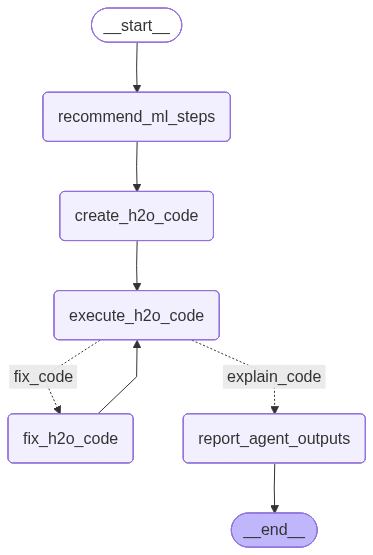

In [4]:
ml_agent = H2OMLAgent(
    model=llm, 
    log=True, 
    log_path=LOG_PATH,
    model_directory=MODEL_PATH, 
    enable_mlflow=True, # Use this if you wish to log to MLflow 
)
ml_agent

### Run the Agent

Run the code to run the AI Machine Learning Agent and create the models.

In [5]:
ml_agent.invoke_agent(
    data_raw=df.drop(columns=["customerID"]),
    user_instructions="Please do classification on 'Churn'. Use a max runtime of 30 seconds.",
    target_variable="Churn"
)

---H2O ML AGENT----
    * RECOMMEND MACHINE LEARNING STEPS
    * CREATE H2O AUTOML CODE
      File saved to: logs/h2o_automl.py
    * EXECUTING AGENT CODE
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21); OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from /Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpwh_cwehb
  JVM stdout: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpwh_cwehb/h2o_mdancho_started_from_python.out
  JVM stderr: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpwh_cwehb/h2o_mdancho_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O 

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"1 year, 8 months and 25 days"
H2O_cluster_name:,H2O_from_python_mdancho_o0xcq2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:43:47.340: Stopping tolerance set by the user is < 70% of the recommended default of 0.011915743770127944, so models may take a long time to converge or may not converge at all.

███████████████████████████████████████████████████████████████| (done) 100%
    * REPORT AGENT OUTPUTS


/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


#### Leaderboard

The leaderboard shows the ML models created by the AI Machine Learning Agent ranked by various ML metrics.

In [6]:
# Retrieve and display the leaderboard of models
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,GBM_1_AutoML_1_20251209_134347,0.845942,0.415411,0.663387,0.233948,0.367362,0.134955
1,GLM_1_AutoML_1_20251209_134347,0.845134,0.417470,0.652031,0.234092,0.368076,0.135480
2,GBM_2_AutoML_1_20251209_134347,0.840165,0.424613,0.657066,0.239994,0.371164,0.137763
3,XRT_1_AutoML_1_20251209_134347,0.838123,0.428915,0.651451,0.236055,0.373509,0.139509
4,GBM_3_AutoML_1_20251209_134347,0.837390,0.430798,0.656383,0.242824,0.372791,0.138973
5,XGBoost_3_AutoML_1_20251209_134347,0.834582,0.487437,0.648264,0.244969,0.403441,0.162764
6,GBM_4_AutoML_1_20251209_134347,0.828237,0.446254,0.633464,0.252152,0.379254,0.143833
7,DRF_1_AutoML_1_20251209_134347,0.826586,0.489943,0.622702,0.245192,0.384574,0.147897
8,XGBoost_1_AutoML_1_20251209_134347,0.823820,0.501960,0.623940,0.250824,0.406752,0.165447
9,XGBoost_2_AutoML_1_20251209_134347,0.819494,0.508976,0.614372,0.258332,0.407913,0.166393


#### Get The AI Generated Python Code

The AI Machine Learning Agent will generate Python code that was used to create the models.

In [7]:
# Get the H2O training function in markdown format
ml_agent.get_h2o_train_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-12-09 13:43:38

def h2o_automl(
    data_raw,
    target: str = 'Churn',
    max_runtime_secs: int = 30,
    exclude_algos: list = None,
    balance_classes: bool = True,
    nfolds: int = 5,
    seed: int = 42,
    max_models: int = 20,
    stopping_metric: str = "logloss",
    stopping_tolerance: float = 0.001,
    stopping_rounds: int = 3,
    sort_metric: str = "AUC",
    model_directory: str = "h2o_models/",
    log_path: str = "logs/",
    enable_mlflow: bool = False,
    mlflow_tracking_uri: str = None,
    mlflow_experiment_name: str = "H2O AutoML",
    mlflow_run_name: str = None,
    **kwargs
):

    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd
    import mlflow
    from contextlib import nullcontext

    # Determine if MLflow is enabled and set up tracking if so
    if enable_mlflow:
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name)
    else:
        run_context = nullcontext()

    exclude_algos = exclude_algos or ["DeepLearning"]

    # Convert data to DataFrame
    df = pd.DataFrame(data_raw)

    with run_context as run:
        # If using MLflow, track run ID
        run_id = None
        if enable_mlflow and run is not None:
            run_id = run.info.run_id

        # Initialize H2O
        h2o.init()

        # Create H2OFrame
        data_h2o = h2o.H2OFrame(df)

        # Define predictor variables
        x = [col for col in data_h2o.columns if col != target]

        # Setup AutoML
        aml = H2OAutoML(
            max_runtime_secs=max_runtime_secs,
            balance_classes=balance_classes,
            stopping_metric=stopping_metric,
            stopping_tolerance=stopping_tolerance,
            stopping_rounds=stopping_rounds,
            exclude_algos=exclude_algos,
            nfolds=nfolds,
            sort_metric=sort_metric,
            seed=seed,
            max_models=max_models,
            **kwargs
        )

        # Train the model
        aml.train(x=x, y=target, training_frame=data_h2o)

        # Save model and construct path
        model_path = h2o.save_model(model=aml.leader, path=model_directory, force=True)

        # Leaderboard (DataFrame -> dict)
        leaderboard_df = aml.leaderboard.as_data_frame()
        leaderboard_dict = leaderboard_df.to_dict(orient='records')

        # Gather top-model metrics from the first row
        top_metrics = leaderboard_df.iloc[0].to_dict()

        # Construct model_results
        model_results = {
            "model_flavor": "H2O AutoML",
            "model_path": model_path,
            "best_model_id": aml.leader.model_id,
            "metrics": top_metrics
        }

        # IMPORTANT: Log these to MLflow if enabled
        if enable_mlflow and run is not None:
            # Log the top metrics if numeric
            numeric_metrics = {k: v for k, v in top_metrics.items() if isinstance(v, (int, float))}
            mlflow.log_metrics(numeric_metrics)

            # Log artifact if we saved the model
            mlflow.h2o.log_model(aml.leader, artifact_path=model_path)

        # Build the output
        output = {
            "leaderboard": leaderboard_dict,
            "best_model_id": aml.leader.model_id,
            "model_path": model_path,
            "model_results": model_results,
            "mlflow_run_id": run_id
        }

    return output
```

#### Recommended ML Steps

The AI Machine Learning Agent will provide you with a recommended set of ML steps, which were used to help the Coding Agent create the H2O AutoML models.

In [8]:
# Get the recommended machine learning steps in markdown format
ml_agent.get_recommended_ml_steps(markdown=True)

# Recommended ML Steps:
Here is a concise list of recommendations for performing H2O AutoML on the given dataset to maximize model accuracy, taking into consideration user instructions and dataset characteristics.

1. **Identify the Response Column**: 
   - Set `y` to the target variable: `Churn`.

2. **Define Predictor Features**:
   - Use all other columns as predictors (`x`), excluding `Churn`.

3. **Max Runtime Configuration**:
   - Utilize `max_runtime_secs = 30` to adhere to the user instruction of a 30-second limit.

4. **Balancing Classes**:
   - Set `balance_classes = True` to address potential class imbalance, especially if "Churn" is skewed.

5. **Stopping Criteria**:
   - Use `stopping_metric = "logloss"` for binary classification which focuses on misclassification costs for better predictive performance.
   - Set `stopping_tolerance = 0.001` for more sensitive stopping criteria and ensure that model training continues until significant improvement is not observed.
   - `stopping_rounds = 3` to control early stopping based on improvements in logloss.

6. **Exclude Deep Learning Models**:
   - Exclude deep learning models to avoid low performance algorithms from the training pool:
     ```python
     exclude_algos = ["DeepLearning"]
     ```

7. **Model Optimization**:
   - Consider using `max_models` to specify the maximum number of models to train, such as `max_models = 10` for greater diversity while remaining efficient.
   - Explore using `nfolds = 5` for k-fold cross-validation when assessing model performance, providing robust insights while fitting.

8. **Sorting Criteria**:
   - Use `sort_metric = "AUC"` for binary classification to rank models based on their ability to distinguish between classes.

9. **Random Seed for Reproducibility**:
   - Optionally set a random seed to ensure reproducibility of results, e.g., `seed = 42`.

10. **Output Detailed Leaderboard**:
   - Enable additional insights during the leaderboard presentation by using `extra_columns = "ALL"` to indicate training and prediction timings in the output.

11. **Advanced Parameters**:
   - Consider adding `exploration_ratio = 0.1` to allocate some budget towards fine-tuning models, if applicable.

### Example Parameter Summary for AutoML Call
```python
aml = H2OAutoML(
    max_runtime_secs=30,
    balance_classes=True,
    stopping_metric="logloss",
    stopping_tolerance=0.001,
    stopping_rounds=3,
    exclude_algos=["DeepLearning"],
    nfolds=5,
    sort_metric="AUC",
    seed=42
)
```
Each choice should enhance model accuracy while aligning with user constraints and being mindful of the dataset structure.

#### Get A Complete Workflow Summary

The AI Machine Learning Agent will provide you with a complete workflow summary that includes the Best ML model created, the recommended ML steps, and the Python code used to create the models.

In [9]:
# Get a summary of the workflow in markdown format
ml_agent.get_workflow_summary(markdown=True)

# H2O Machine Learning Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended ML Steps:
Here is a concise list of recommendations for performing H2O AutoML on the given dataset to maximize model accuracy, taking into consideration user instructions and dataset characteristics.

1. **Identify the Response Column**: 
   - Set `y` to the target variable: `Churn`.

2. **Define Predictor Features**:
   - Use all other columns as predictors (`x`), excluding `Churn`.

3. **Max Runtime Configuration**:
   - Utilize `max_runtime_secs = 30` to adhere to the user instruction of a 30-second limit.

4. **Balancing Classes**:
   - Set `balance_classes = True` to address potential class imbalance, especially if "Churn" is skewed.

5. **Stopping Criteria**:
   - Use `stopping_metric = "logloss"` for binary classification which focuses on misclassification costs for better predictive performance.
   - Set `stopping_tolerance = 0.001` for more sensitive stopping criteria and ensure that model training continues until significant improvement is not observed.
   - `stopping_rounds = 3` to control early stopping based on improvements in logloss.

6. **Exclude Deep Learning Models**:
   - Exclude deep learning models to avoid low performance algorithms from the training pool:
     ```python
     exclude_algos = ["DeepLearning"]
     ```

7. **Model Optimization**:
   - Consider using `max_models` to specify the maximum number of models to train, such as `max_models = 10` for greater diversity while remaining efficient.
   - Explore using `nfolds = 5` for k-fold cross-validation when assessing model performance, providing robust insights while fitting.

8. **Sorting Criteria**:
   - Use `sort_metric = "AUC"` for binary classification to rank models based on their ability to distinguish between classes.

9. **Random Seed for Reproducibility**:
   - Optionally set a random seed to ensure reproducibility of results, e.g., `seed = 42`.

10. **Output Detailed Leaderboard**:
   - Enable additional insights during the leaderboard presentation by using `extra_columns = "ALL"` to indicate training and prediction timings in the output.

11. **Advanced Parameters**:
   - Consider adding `exploration_ratio = 0.1` to allocate some budget towards fine-tuning models, if applicable.

### Example Parameter Summary for AutoML Call
```python
aml = H2OAutoML(
    max_runtime_secs=30,
    balance_classes=True,
    stopping_metric="logloss",
    stopping_tolerance=0.001,
    stopping_rounds=3,
    exclude_algos=["DeepLearning"],
    nfolds=5,
    sort_metric="AUC",
    seed=42
)
```
Each choice should enhance model accuracy while aligning with user constraints and being mindful of the dataset structure.

## ---H2O TRAIN FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-12-09 13:43:38

def h2o_automl(
    data_raw,
    target: str = 'Churn',
    max_runtime_secs: int = 30,
    exclude_algos: list = None,
    balance_classes: bool = True,
    nfolds: int = 5,
    seed: int = 42,
    max_models: int = 20,
    stopping_metric: str = "logloss",
    stopping_tolerance: float = 0.001,
    stopping_rounds: int = 3,
    sort_metric: str = "AUC",
    model_directory: str = "h2o_models/",
    log_path: str = "logs/",
    enable_mlflow: bool = False,
    mlflow_tracking_uri: str = None,
    mlflow_experiment_name: str = "H2O AutoML",
    mlflow_run_name: str = None,
    **kwargs
):

    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd
    import mlflow
    from contextlib import nullcontext

    # Determine if MLflow is enabled and set up tracking if so
    if enable_mlflow:
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name)
    else:
        run_context = nullcontext()

    exclude_algos = exclude_algos or ["DeepLearning"]

    # Convert data to DataFrame
    df = pd.DataFrame(data_raw)

    with run_context as run:
        # If using MLflow, track run ID
        run_id = None
        if enable_mlflow and run is not None:
            run_id = run.info.run_id

        # Initialize H2O
        h2o.init()

        # Create H2OFrame
        data_h2o = h2o.H2OFrame(df)

        # Define predictor variables
        x = [col for col in data_h2o.columns if col != target]

        # Setup AutoML
        aml = H2OAutoML(
            max_runtime_secs=max_runtime_secs,
            balance_classes=balance_classes,
            stopping_metric=stopping_metric,
            stopping_tolerance=stopping_tolerance,
            stopping_rounds=stopping_rounds,
            exclude_algos=exclude_algos,
            nfolds=nfolds,
            sort_metric=sort_metric,
            seed=seed,
            max_models=max_models,
            **kwargs
        )

        # Train the model
        aml.train(x=x, y=target, training_frame=data_h2o)

        # Save model and construct path
        model_path = h2o.save_model(model=aml.leader, path=model_directory, force=True)

        # Leaderboard (DataFrame -> dict)
        leaderboard_df = aml.leaderboard.as_data_frame()
        leaderboard_dict = leaderboard_df.to_dict(orient='records')

        # Gather top-model metrics from the first row
        top_metrics = leaderboard_df.iloc[0].to_dict()

        # Construct model_results
        model_results = {
            "model_flavor": "H2O AutoML",
            "model_path": model_path,
            "best_model_id": aml.leader.model_id,
            "metrics": top_metrics
        }

        # IMPORTANT: Log these to MLflow if enabled
        if enable_mlflow and run is not None:
            # Log the top metrics if numeric
            numeric_metrics = {k: v for k, v in top_metrics.items() if isinstance(v, (int, float))}
            mlflow.log_metrics(numeric_metrics)

            # Log artifact if we saved the model
            mlflow.h2o.log_model(aml.leader, artifact_path=model_path)

        # Build the output
        output = {
            "leaderboard": leaderboard_dict,
            "best_model_id": aml.leader.model_id,
            "model_path": model_path,
            "model_results": model_results,
            "mlflow_run_id": run_id
        }

    return output
```

## ---H2O TRAIN FUNCTION PATH----
```python
logs/h2o_automl.py
```

## ---H2O TRAIN FUNCTION NAME----
```python
h2o_automl
```

## ---H2O TRAIN ERROR----
None

## ---H2O TRAIN ERROR LOG PATH----
<h2o_train_error_log_path_not_found_in_state>

## ---MODEL PATH----
/Users/mdancho/Desktop/course_code/ai-data-science-team/h2o_models/GBM_1_AutoML_1_20251209_134347

## ---BEST MODEL ID----
GBM_1_AutoML_1_20251209_134347

#### Get The Logging Summary 

The AI Machine Learning Agent will provide you with a logging summary that includes the ML models created and Python code location.

In [10]:
# Get a summary of the logs in markdown format
ml_agent.get_log_summary(markdown=True)


## H2O Machine Learning Agent Log Summary:

Function Path: logs/h2o_automl.py

Function Name: h2o_automl

Best Model ID: GBM_1_AutoML_1_20251209_134347

Model Path: /Users/mdancho/Desktop/course_code/ai-data-science-team/h2o_models/GBM_1_AutoML_1_20251209_134347
                

#### Get the Best Model ID

In [11]:
ml_agent.get_best_model_id()

'GBM_1_AutoML_1_20251209_134347'

### Load The Model

Run the code to load the model and view the model summary, get performance metrics, make predictions, and explain the model.

In [12]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 min 30 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"1 year, 8 months and 25 days"
H2O_cluster_name:,H2O_from_python_mdancho_o0xcq2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.98 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


#### Load The Model and Display Performance

In [13]:
# Load the model
model = h2o.get_model(ml_agent.get_best_model_id())

model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20251209_134347


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    43                 43                          35488                  9            15           11.5116       57            65            60.8837

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1622888539657691
RMSE: 0.40285090786265965
LogLoss: 0.48097909366632
Mean Per-Class Error: 0.18841949587378634
AUC: 0.9017817654632808
AUCPR: 0.8920477254653795
Gini: 0.8035635309265616

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18633060095595907
       No    Yes    Error    Rate
-----  ----  -----  -------  ----------------
No     3623  1551   0.2998   (1551.0/5174.0)
Yes    401   4802   0.0771   (401.0/5203.0)
Total  4024  6353   0.1881   (1952.0/10377.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.186331     0.831083  293
max f2                       0.0993628    0.89871   338
max f0point5                 0.410115     0.825763  199
max accuracy                 0.282873     0.821239  254
max precision                0.905544     1         0
max recall                   0.0265823    1         380
max specificity              0.905544     1         0
max absolute_mcc             0.282873     0.643393  254
max min_per_class_accuracy   0.309803     0.817743  242
max mean_per_class_accuracy  0.282873     0.821161  254
max tns                      0.905544     5174      0
max fns                      0.905544     5197      0
max fps                      0.00624543   5174      399
max tps                      0.0265823    5203      380
max tnr                      0.905544     1         0
max fnr                      0.905544     0.998847  0
max fpr                      0.00624543   1         399
max tpr                      0.0265823    1         380

Gains/Lift Table: Avg response rate: 50.14 %, avg score: 34.44 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101185                   0.881647           1.99443    1.99443            1                0.888735   1                           0.888735            0.0201807       0.0201807                  99.4426   99.4426            0.0201807
2        0.0201407                   0.866719           1.97525    1.98488            0.990385         0.874019   0.995215                    0.881412            0.0197963       0.0399769                  97.5249   98.4884            0.0397837
3        0.030452                    0.851774           1.95715    1.97549            0.981308         0.858716   0.990506                    0.873727            0.0201807       0.0601576                  95.7147   97.5492            0.0595778
4        0.0400887                   0.837536           1.93459    1.96566            0.97             0.844368   0.985577                    0.86667             0.0186431       0.0788007                  93.4594   96.5661            0.077641
5        0.0500145                   0.825159           1.93634    1.95984            0.970874         0.831556   0.982659         

#### Make Predictions

Run the code to make predictions using the model.

In [14]:
# Make predictions using the loaded model
model.predict(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.334969,0.665031
No,0.974358,0.0256417
Yes,0.591795,0.408205
No,0.97161,0.0283901
Yes,0.419851,0.580149
Yes,0.117378,0.882622
Yes,0.662177,0.337823
No,0.863572,0.136428
Yes,0.508539,0.491461
No,0.981416,0.018584


# Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)